In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
# load train and test data
mnist_train = np.loadtxt('../data/train.csv', delimiter=',', dtype=int, skiprows=1)
mnist_test = np.loadtxt('../data/test.csv', delimiter=',', dtype=int, skiprows=1)

In [3]:
# split the data into training and validation sets
X_train = mnist_train[:,1:]
y_train = mnist_train[:,0]
X_test = mnist_test

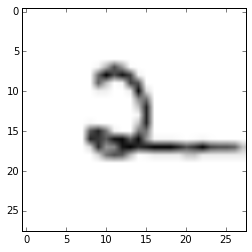

In [13]:
image = X_train[55,:].reshape(28, 28)
imshow(image, cmap=plt.cm.Greys)

In [14]:
from scipy.spatial import ConvexHull

In [15]:
data = np.transpose(np.nonzero(image))
hull = ConvexHull(data)

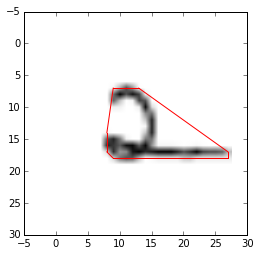

In [21]:
imshow(image, cmap=plt.cm.Greys)
for simplex in hull.simplices:
    plot(data[simplex,1], data[simplex,0], 'r-')
dh = data[hull.vertices]

In [22]:
from fit_ellipse import *

In [23]:
x = dh[:,0]
y = dh[:,1]

a = fitEllipse(x,y)
center = ellipse_center(a)
phi = ellipse_angle_of_rotation(a)
axes = ellipse_axis_length(a)
print center, phi, axes

yc, xc = center
theta = phi
b, a = axes

[ 16.8907474  17.5381956] -0.758754040715 [  7.42510269  12.59791788]


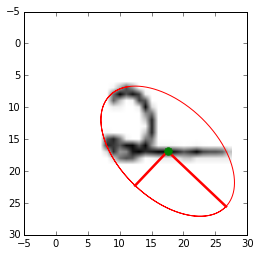

In [25]:
fig, ax = plt.subplots()
ax.imshow(image, cmap=plt.cm.Greys)
x1 = xc + a*cos(-theta)
y1 = yc + a*sin(-theta)
x2 = xc - b*sin(-theta)
y2 = yc + b*cos(-theta)

ax.plot((xc, x1), (yc, y1), '-r', linewidth=2.5)
ax.plot((xc, x2), (yc, y2), '-r', linewidth=2.5)
ax.plot(xc, yc, '.g', markersize=15)

arc = pi
R = np.arange(0,arc*np.pi, 0.01)
b,a = axes
yc,xc = center
xx = xc + a*np.cos(R)*np.cos(-theta) - b*np.sin(R)*np.sin(-theta)
yy = yc + a*np.cos(R)*np.sin(-theta) + b*np.sin(R)*np.cos(-theta)
plot(xx,yy, color = 'red')

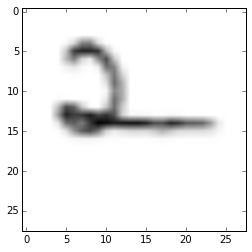

In [19]:
from skimage.transform import AffineTransform, warp, rotate, rescale

# move to center
tform = AffineTransform(translation=(xc - 14, yc - 14))
out = warp(image, tform, preserve_range=True)

#if(a > b):
#    out = rotate(out, np.degrees(-theta) - 90, preserve_range=True)
#else:
#    out = rotate(out, np.degrees(-theta), preserve_range=True)

#out = rotate(out, np.degrees(-theta), preserve_range=True)

imshow(out, cmap=plt.cm.Greys)

In [11]:
Xn_train = np.empty(X_train.shape)
for i in range(len(X_train)):
    image = X_train[i,:].reshape(28, 28)
    
    # bounding box
    data = np.transpose(np.nonzero(image))
    hull = ConvexHull(data)
    dh = data[hull.vertices]
   
    # fit ellipse
    A = fitEllipse(dh[:,0],dh[:,1])
    yc, xc = np.real(ellipse_center(A))
    theta =  np.real(ellipse_angle_of_rotation(A))
    b, a = np.real(ellipse_axis_length(A))
    
    # move to center
    tform = AffineTransform(translation=(xc - 14, yc - 14))
    out = warp(image, tform, preserve_range=True)

    #if(a > b):
    #    out = rotate(out, np.degrees(-theta) - 90, preserve_range=True)
    #else:
    #    out = rotate(out, np.degrees(-theta), preserve_range=True)
        
    #out = rotate(out, np.degrees(-theta), preserve_range=True)
        
    Xn_train[i,:] = out.astype(int).reshape(784)

fit_ellipse.py:35: RuntimeWarning: invalid value encountered in sqrt
  res2=np.sqrt(up/down2)
fit_ellipse.py:34: RuntimeWarning: invalid value encountered in sqrt
  res1=np.sqrt(up/down1)


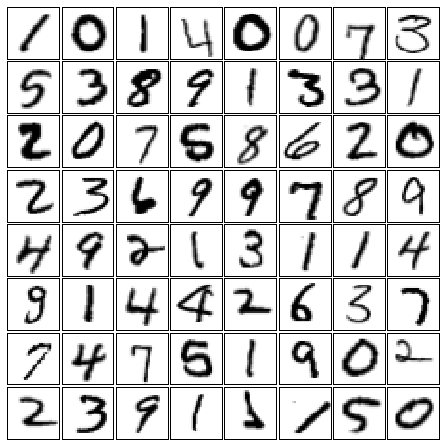

In [12]:
# copied from examples 
fig = plt.figure(figsize=(6, 6))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(Xn_train[i].reshape(28, 28), cmap=plt.cm.binary, interpolation='nearest')

In [188]:
with open("train_n.csv", 'w') as f:
    f.write('label')
    for i in range(784):
        f.write(',pixel%d' % i)
    f.write('\n')
    for i in range(len(X_train)):
        f.write('%d' % y_train[i])
        for j in range(784):
            f.write(',%d' % Xn_train[i,j])
        f.write('\n')